In [1]:
from tensorflow import keras
from tensorflow.keras.utils import Sequence
import tensorflow as tf
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
devices=tf.config.experimental.list_physical_devices('GPU')
print("GPUS: ", len(devices))
tf.config.experimental.set_memory_growth(devices[0],True)

GPUS:  1


In [3]:
model=keras.models.load_model('best_models/try4')

In [4]:
class DataGenerator(Sequence):

  def __init__(self, base_dir,base_dir2, output_size, shuffle=False, batch_size=10):
    self.base_dir = base_dir
    self.base_dir2 = base_dir2
    self.output_size = output_size
    self.shuffle = shuffle
    self.batch_size = batch_size
    self.all_x = os.listdir(base_dir)
    self.all_y = os.listdir(base_dir2)
    self.on_epoch_end()

  def on_epoch_end(self):
    self.indices = np.arange(len(self.all_x))
    if self.shuffle:
      np.random.shuffle(self.indices)

  def __len__(self):
    return int(len(self.all_x) / self.batch_size)

  def __getitem__(self, idx):
    X = np.empty((self.batch_size, *self.output_size, 3))
    Y = np.empty((self.batch_size, *self.output_size, 3))

    indices = self.indices[idx*(self.batch_size): (idx+1)*(self.batch_size)]
    

    for i,j in enumerate(indices):
      img_path = os.path.join(self.base_dir,self.all_x[j])
      img_path2 = os.path.join(self.base_dir2,self.all_y[j])
        
      img  = cv2.imread(img_path)
      img= cv2.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),self.output_size)
      img2 = cv2.imread(img_path2)
      img2= cv2.resize(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB),self.output_size)
#       print(img_path,img_path2)

      X[i,] = img
      Y[i,] = img2
    X= X.astype('float32')/255
    Y= Y.astype('float32')/255

    return X, Y

In [5]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    img=img*255
    img=img.astype(np.uint8)
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [6]:
test  = DataGenerator('data/test_x/test_x','data/test_y/test_y',(128,128), batch_size=1, shuffle=False)

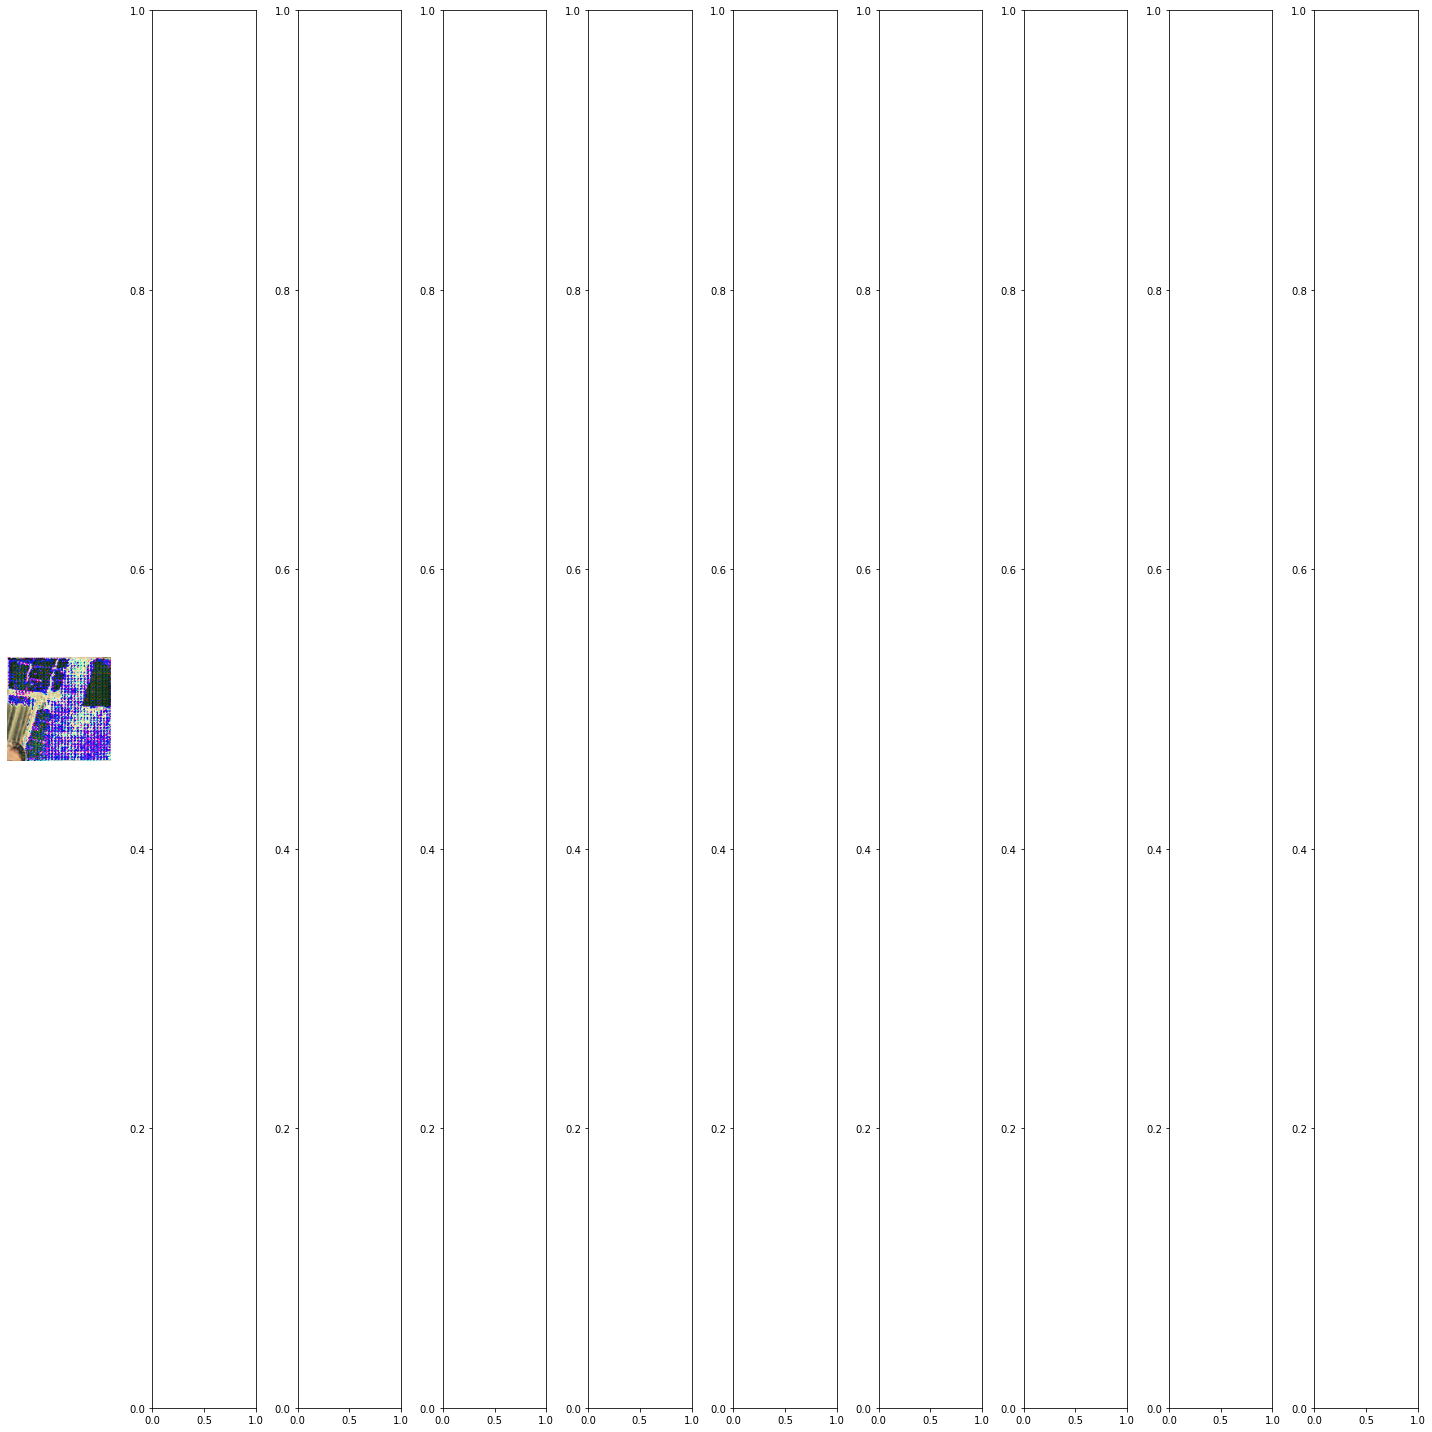

In [9]:
testx,testy=test[3]
testx.shape
prediction= model.predict(model.predict(testx))
plotImages(prediction)

In [ ]:
for i in range(20):
    testx,testy= test[i]
    prediction= model.predict(model.predict(testx))
    plotImages(testx)
    plotImages(prediction)
    plotImages(testy)

In [ ]:
testx,testy= test[2]
prediction= model.predict(testy)
cv2.imshow('deblurred',cv2.resize(prediction[4],(0,0),fx=3,fy=3))
cv2.imshow('reallarge',cv2.resize(testy[4],(0,0),fx=3,fy=3))
cv2.imshow('real small',cv2.resize(testy[4],(0,0),fx=3,fy=3))
#cv2.imshow('blurred',cv2.resize(testx[4],(0,0),fx=3,fy=3))
cv2.waitKey(0)
cv2.destroyAllWindows()